In [39]:
import torch
from torchvision.transforms import v2
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [ ]:
### 1. Image Dataset Extraction and Preprocessing

## 1.1 Getting training and testing dataset directory
## 1.2 Function of extracting dataset images
## 1.3 Extracting dataset images
## 1.4 Image size and total image count
## 1.5 Function of label count for 1.7
## 1.6 Function of graph plot for 1.7
## 1.7 Dataset and label distribution graph
## 1.8 Showcase first image of train and testing dataset
## 1.9 Function of extracting first n images of all emotions for 1.10
## 1.10 Showcase grid of example images of all emotion labels
## 1.11 Function for detecting faces using Haar Cascade Classifier for 1.12
## 1.12 Showcase detected face comparison with original image 
## 1.13 Function to crop detected face and scale to 48x48 pixels for 1.14
## 1.14 Showcase comparison between original image and cropped detected face image
## 1.15 Showcase of comparisons between original image and randomly horizontal fliped image
## 1.16 Showcase of comparisons between original image and randomly cropped image up to 10%
## 1.17 Showcase of comparisons between original image and scalling image between 80% to 120% and rotating betweeen -25 to 25
## 1.18 Showcase of comparisons between original image and brightness adjusted image
## 1.19 Showcase of comparisons between original image and contrast adjusted image
## 1.20 Calculate mean and standard deviation of the dataset
## 1.21 Showcase of comparisons between original image and normalized image
## 1.22 Showcase 10 Transformed Image With Combination of All Transformation 
## 1.5 Perform necessary preprocessing measures

In [41]:
## 1.1 Getting training and testing dataset directory

current_wd = os.getcwd()

train_directory = os.path.join(current_wd, "raw_data", "train")

test_directory = os.path.join(current_wd, "raw_data", "test")

print(train_directory)
print(test_directory)

c:\Users\ADMIN\OneDrive\SHARED FILES\D2 Sem3\Methods & Application of Deep Learning (MADL)\Final Project\Github Group Repository\DL-Assignment\raw_data\train
c:\Users\ADMIN\OneDrive\SHARED FILES\D2 Sem3\Methods & Application of Deep Learning (MADL)\Final Project\Github Group Repository\DL-Assignment\raw_data\test


In [42]:
## 1.2 Function of extracting dataset images

def datasetLoader(root):
    imgPaths = []
    labels = []

    for label in os.listdir(root):
        emotionDir = os.path.join(root, label)
        for filename in os.listdir(emotionDir):
            imgPath = os.path.join(root, label, filename)
            imgPaths.append(imgPath)
            labels.append(label)
        
        print(f"Faces of '{label}' extraction completed.")
    
    return imgPaths, labels

In [43]:
## 1.3.1 Extracting dataset images (training)

train_img, train_label = datasetLoader(train_directory)

print("\n", train_img[:5], "\n")
print(train_label[:5])

Faces of 'angry' extraction completed.
Faces of 'disgust' extraction completed.
Faces of 'fear' extraction completed.
Faces of 'happy' extraction completed.
Faces of 'neutral' extraction completed.
Faces of 'sad' extraction completed.
Faces of 'surprise' extraction completed.

 ['c:\\Users\\ADMIN\\OneDrive\\SHARED FILES\\D2 Sem3\\Methods & Application of Deep Learning (MADL)\\Final Project\\Github Group Repository\\DL-Assignment\\raw_data\\train\\angry\\Training_10118481.jpg', 'c:\\Users\\ADMIN\\OneDrive\\SHARED FILES\\D2 Sem3\\Methods & Application of Deep Learning (MADL)\\Final Project\\Github Group Repository\\DL-Assignment\\raw_data\\train\\angry\\Training_10120469.jpg', 'c:\\Users\\ADMIN\\OneDrive\\SHARED FILES\\D2 Sem3\\Methods & Application of Deep Learning (MADL)\\Final Project\\Github Group Repository\\DL-Assignment\\raw_data\\train\\angry\\Training_10131352.jpg', 'c:\\Users\\ADMIN\\OneDrive\\SHARED FILES\\D2 Sem3\\Methods & Application of Deep Learning (MADL)\\Final Project\\

In [44]:
## 1.3.2 Extracting dataset images (testing)

test_img, test_label = datasetLoader(test_directory)

print("\n", test_img[:5], "\n")
print(train_label[:5])

Faces of 'angry' extraction completed.
Faces of 'disgust' extraction completed.
Faces of 'fear' extraction completed.
Faces of 'happy' extraction completed.
Faces of 'neutral' extraction completed.
Faces of 'sad' extraction completed.
Faces of 'surprise' extraction completed.

 ['c:\\Users\\ADMIN\\OneDrive\\SHARED FILES\\D2 Sem3\\Methods & Application of Deep Learning (MADL)\\Final Project\\Github Group Repository\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_10131363.jpg', 'c:\\Users\\ADMIN\\OneDrive\\SHARED FILES\\D2 Sem3\\Methods & Application of Deep Learning (MADL)\\Final Project\\Github Group Repository\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_10304478.jpg', 'c:\\Users\\ADMIN\\OneDrive\\SHARED FILES\\D2 Sem3\\Methods & Application of Deep Learning (MADL)\\Final Project\\Github Group Repository\\DL-Assignment\\raw_data\\test\\angry\\PrivateTest_1054527.jpg', 'c:\\Users\\ADMIN\\OneDrive\\SHARED FILES\\D2 Sem3\\Methods & Application of Deep Learning (MADL)\\Final Proj

In [45]:
## 1.4 Image size and total image count

filepath = test_img[0]

img = cv2.imread(filepath)

width = img.shape[1]
height = img.shape[0]

totalImg = 0
totalImg += len(train_img)
totalImg += len(test_img)

print(f"The height of a single image is: {height} pixels")
print(f"The width of a single image is {width} pixels")
print(f"Number of pixels per image: {width*height}\n")

print(f"The total number of train images are {len(train_img)}")
print(f"The total number of test images are {len(test_img)}")
print(f"The total number of images are {totalImg}")

The height of a single image is: 48 pixels
The width of a single image is 48 pixels
Number of pixels per image: 2304

The total number of train images are 28709
The total number of test images are 7178
The total number of images are 35887


In [46]:
## 1.5 Function of label count for 1.7

def labelsCountAndName(label_list):
    name_list = []
    num_list = [0, 0, 0, 0, 0, 0, 0]
    progressPointer = -1

    for label in label_list:
        
        if label not in name_list:
            name_list.append(label)
            progressPointer += 1

        num_list[progressPointer] += 1
    
    return name_list, num_list

In [47]:
## 1.6 Function of graph plot for 1.7

def plotDistributionBarGraph(name_list, num_list, graphTitle):
    plt.bar(name_list, num_list)
    plt.title(graphTitle)
    plt.xlabel("Emotions")
    plt.ylabel("Number of Pictures")
    plt.show()

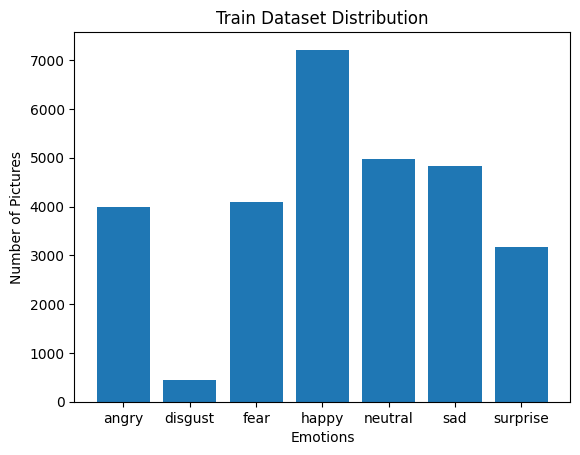

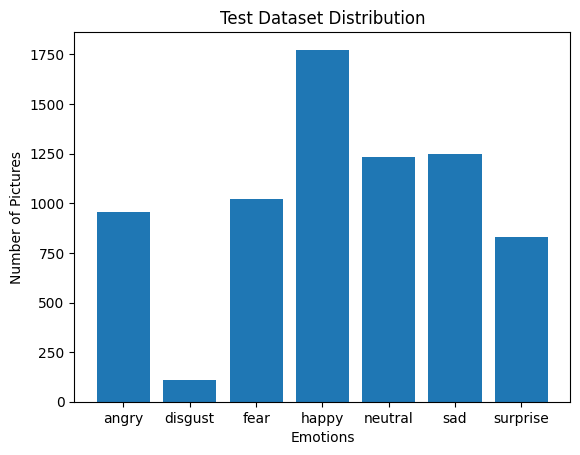

In [48]:
## 1.7 Dataset and label distribution graph

train_nameList, train_numList = labelsCountAndName(train_label)
test_nameList, test_numList = labelsCountAndName(test_label)

plotDistributionBarGraph(train_nameList, train_numList, "Train Dataset Distribution")
plotDistributionBarGraph(test_nameList, test_numList, "Test Dataset Distribution")

<function matplotlib.pyplot.show(close=None, block=None)>

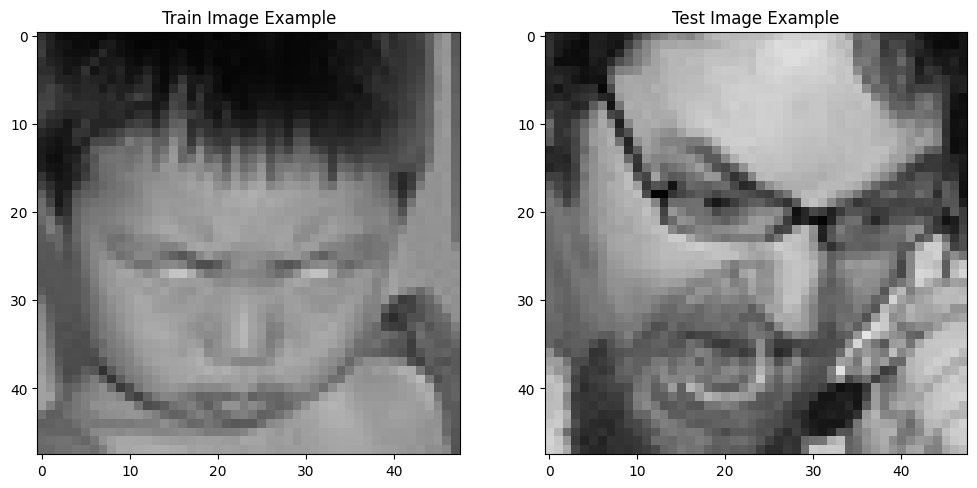

In [49]:
## 1.8 Showcase first image of train and testing dataset

fig = plt.figure(figsize=(12, 7))

trainImgAddress = train_img[0]
testImgAddress = test_img[0]

trainImgData = cv2.imread(trainImgAddress)
testImgData = cv2.imread(testImgAddress)

plt.subplot(1, 2, 1)
plt.imshow(trainImgData, cmap="gray")
plt.title("Train Image Example")

plt.subplot(1, 2, 2)
plt.imshow(testImgData, cmap="gray")
plt.title("Test Image Example")

plt.show

In [50]:
## 1.9 Function of extracting first n images of all emotions for 1.10

def getImagePathAndLabels(numPicPerEmotion):
    picAdd = []
    picLabel = []

    for emotion in train_nameList:
        trainWD = os.path.join(train_directory, emotion)
        testWD = os.path.join(test_directory, emotion)

        numCheck = 0

        for trainImgName in os.listdir(trainWD):
            
            trainImgPath = os.path.join(trainWD, trainImgName)

            picAdd.append(trainImgPath)
            picLabel.append(emotion)
            numCheck += 1
            if numCheck == numPicPerEmotion:
                break
        
        numCheck = 0

        for testImgName in os.listdir(testWD):
            
            testImgPath = os.path.join(testWD, testImgName)

            picAdd.append(testImgPath)
            picLabel.append(emotion)
            numCheck += 1
            if numCheck == numPicPerEmotion:
                break
        
    return picAdd, picLabel


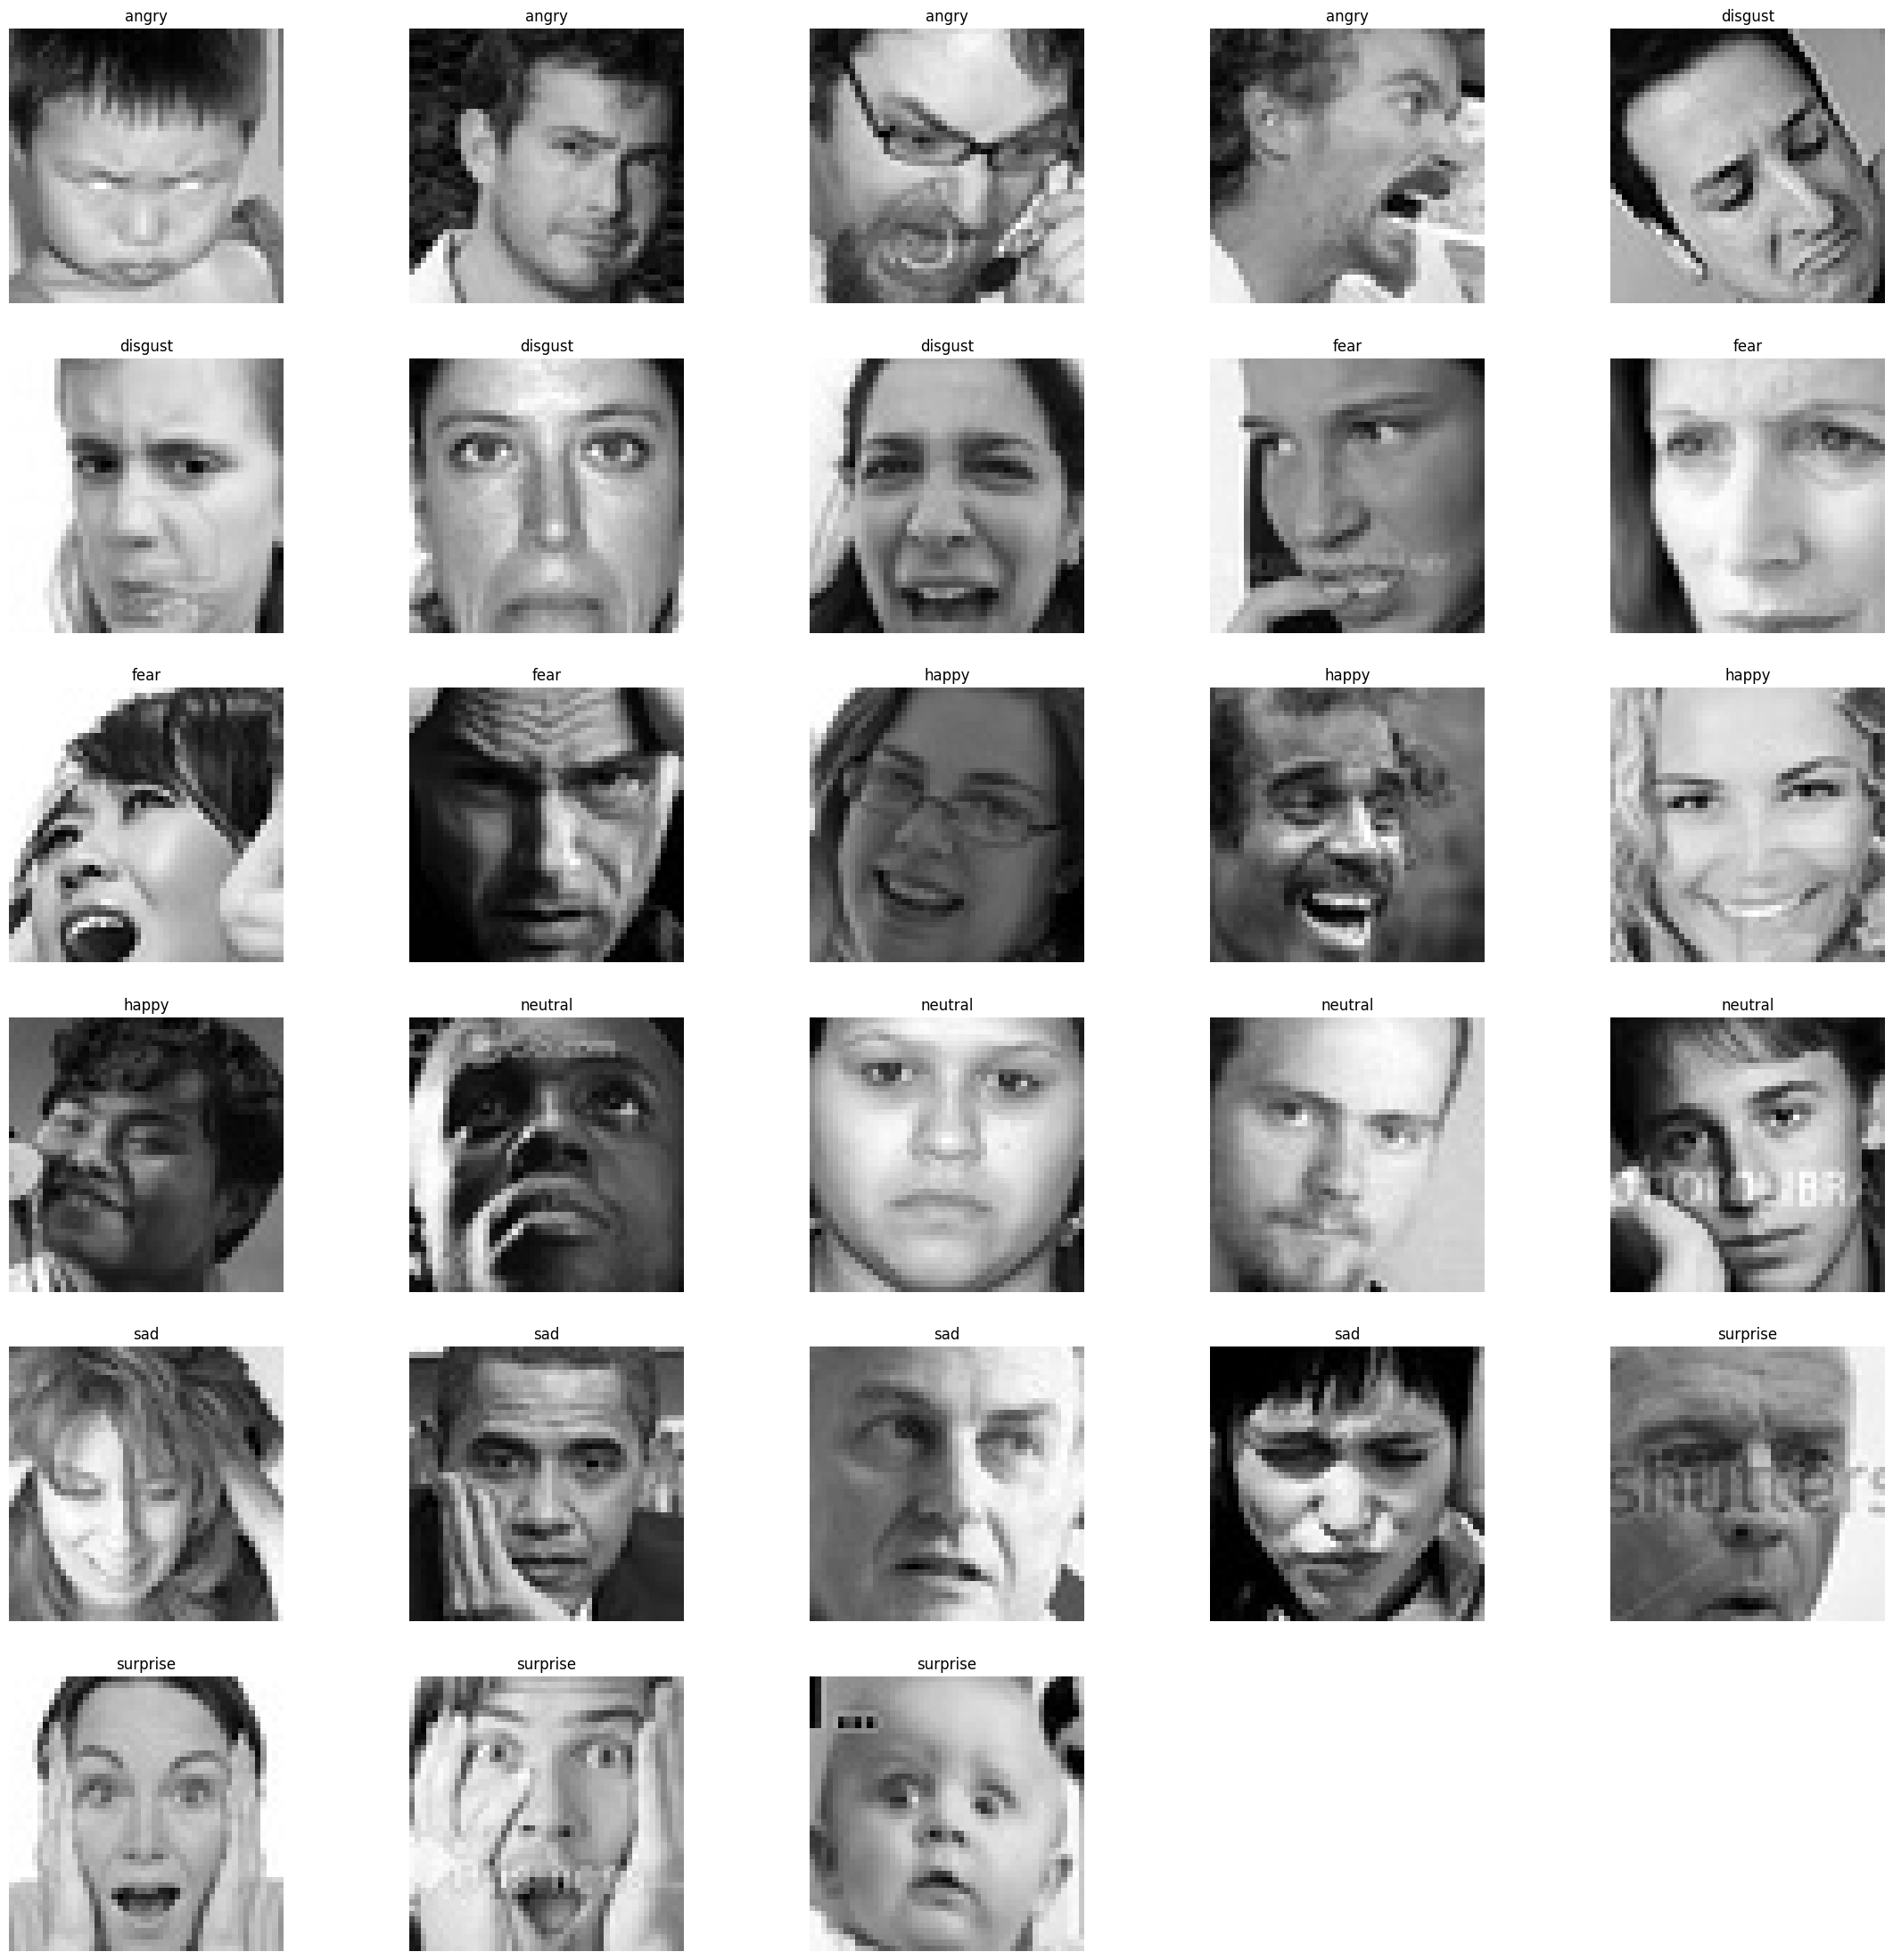

In [51]:
## 1.10 Showcase grid of example images of all emotion labels

import math

numPicPerEmotion = 2

plotSize = numPicPerEmotion * 7 * 2

subplotSize = math.ceil(plotSize / 5)

fig = plt.figure(figsize=(plotSize, plotSize))

picAdd, picLabel = getImagePathAndLabels(numPicPerEmotion)

for i in range(0, plotSize):
    plt.subplot(subplotSize, 5, i+1)
    img = plt.imread(picAdd[i])

    plt.imshow(img, cmap="gray")
    plt.title(picLabel[i])
    plt.axis('off')

plt.show()

In [52]:
## 1.11 Function for detecting faces using Haar Cascade Classifier for 1.12

cascadeXMLPath = os.path.join(current_wd, "haarcascade_frontalface_default.xml")

face_cascade = cv2.CascadeClassifier(cascadeXMLPath)

def adjustedFaceDetection(img):
    face_img = img.copy()

    face_rectangle = face_cascade.detectMultiScale(face_img,
                                                   scaleFactor=1.1, # Image size reduced by 1.1 
                                                   minNeighbors=5) # Amount of detections around the same region to declare it is an object

    for (x, y, w, h) in face_rectangle: # x_coord, y_coord, width, height
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255), 1) # Draw rectangle over detected face

        # (x, y) --> bottom left corner coordinates
        # (x+w, y+h) --> upper right corner coordinates after adding image width and height
        # (255, 255, 255) --> Image color in (R,G,B) which is black color
        # 10 --> Line thickness of 10 pixels

    return face_img

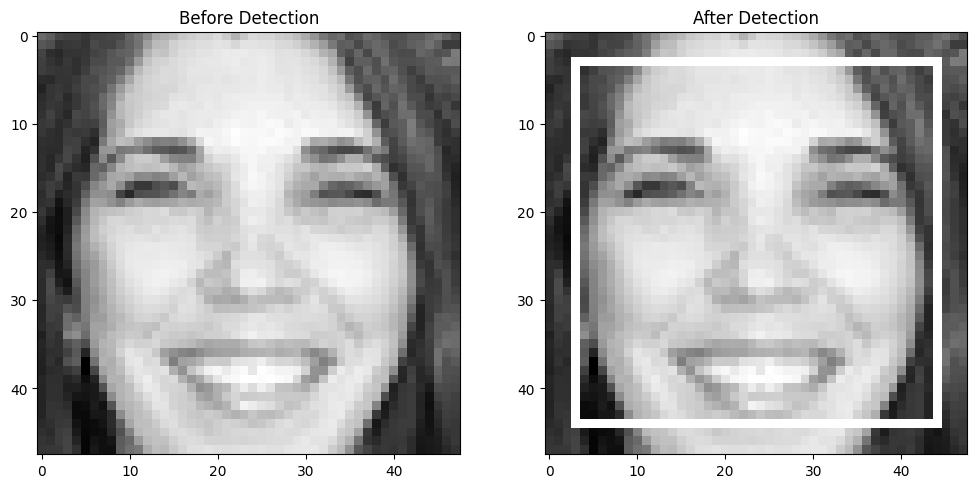

In [53]:
## 1.12 Showcase detected face comparison with original image 

import random

luckyNumber = random.randrange(0, len(train_img))
imgData = plt.imread(train_img[luckyNumber])

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(imgData, cmap='grey')
plt.title("Before Detection")

detectedImgData = adjustedFaceDetection(imgData)

plt.subplot(1, 2, 2)
plt.imshow(detectedImgData, cmap="grey")
plt.title("After Detection")

plt.show()

In [54]:
## 1.13 Function to crop detected face and scale to 48x48 pixels for 1.14

cascadeXMLPath = os.path.join(current_wd, "haarcascade_frontalface_default.xml")

face_cascade = cv2.CascadeClassifier(cascadeXMLPath)


def cropImageOfDetectedFace(img):

    face_rectangle = face_cascade.detectMultiScale(img,
                                                   scaleFactor=1.1, # Image size reduced by 1.1 
                                                   minNeighbors=5) # Amount of detections around the same region to declare it is an object


    for (x, y, w, h) in face_rectangle:

        croppedImg = img[y+1 : y+h, x+1: x+w]

        resizedCroppedImg = cv2.resize(croppedImg, dsize=(48,48))

        return resizedCroppedImg

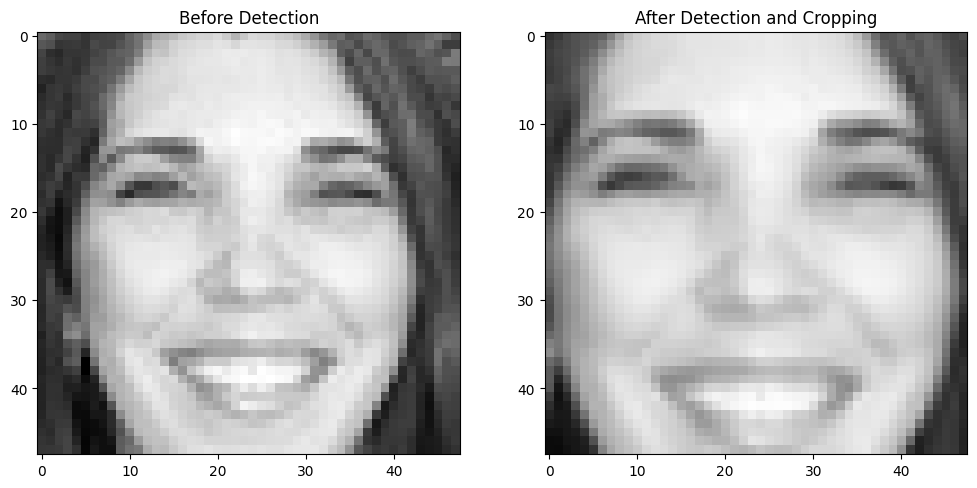

In [55]:
## 1.14 Showcase comparison between original image and cropped detected face image

imgData = cv2.imread(train_img[luckyNumber])

resizedCroppedImg = cropImageOfDetectedFace(imgData)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(imgData, cmap='grey')
plt.title("Before Detection")

plt.subplot(1, 2, 2)
plt.imshow(resizedCroppedImg, cmap="grey")
plt.title("After Detection and Cropping")

plt.show()

Text(0.5, 1.0, 'After Flipping')

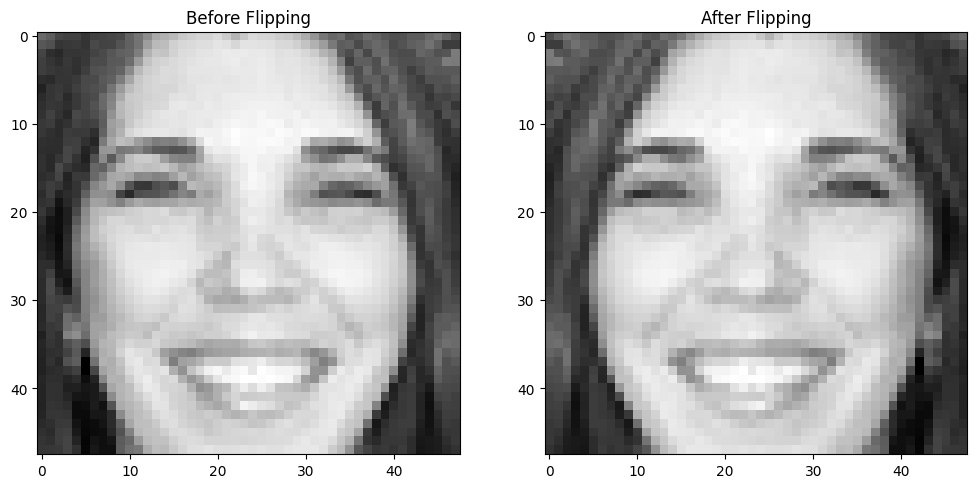

In [56]:
## 1.15 Showcase of comparisons between original image and randomly horizontal fliped image

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomHorizontalFlip(p=1), # 100% chance to flip an image
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Flipping")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Flipping")

Text(0.5, 1.0, 'After Cropping')

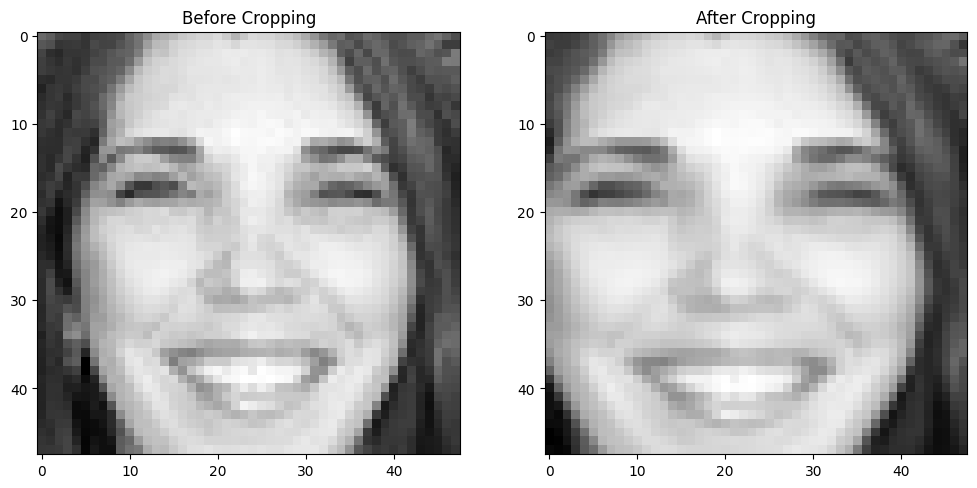

In [ ]:
## 1.16 Showcase of comparisons between original image and randomly cropped image up to 10%

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomResizedCrop(size=(48,48), scale=(0.8, 0.9), antialias=True), # Resize to 48x48 scalling between 0.8 to 0.9
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Cropping")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Cropping")

Text(0.5, 1.0, 'After Affine')

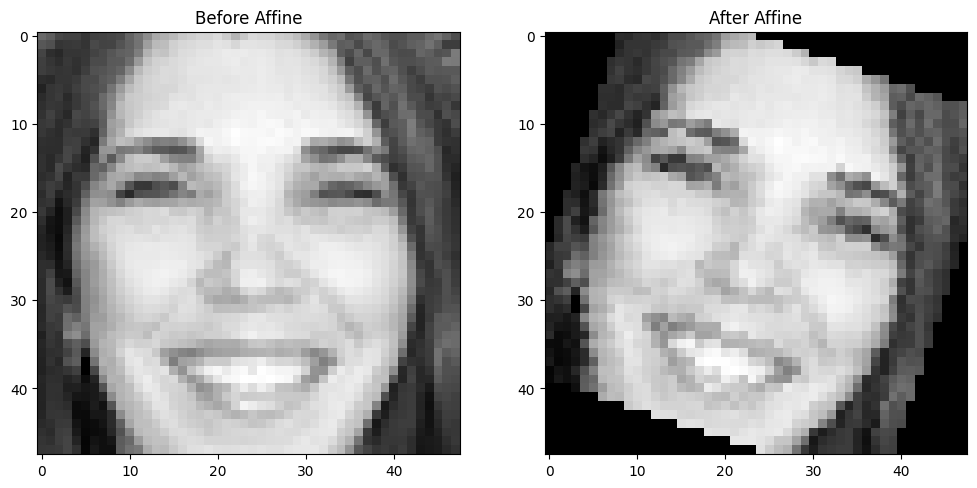

In [ ]:
## 1.17 Showcase of comparisons between original image and scalling image between 80% to 120% and rotating betweeen -25 to 25

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomAffine(degrees=(-20, 20), scale=(0.8, 1.2)), # Random affine transformation the input keeping center invariant.
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Affine")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Affine")

Text(0.5, 1.0, 'After Brightness Adjustment')

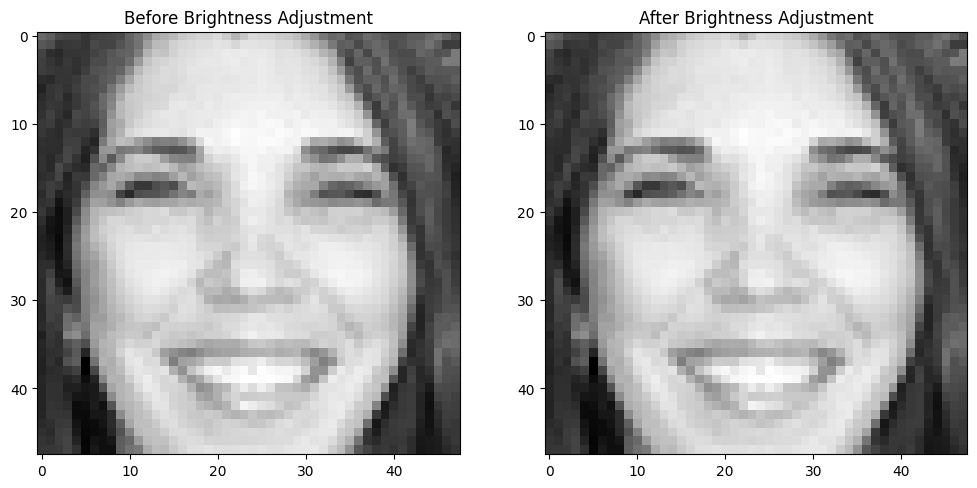

In [59]:
## 1.18 Showcase of comparisons between original image and brightness adjusted image

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomPhotometricDistort(brightness=(0.8, 1.2)),
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Brightness Adjustment")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Brightness Adjustment")

Text(0.5, 1.0, 'After Contrast Adjustment')

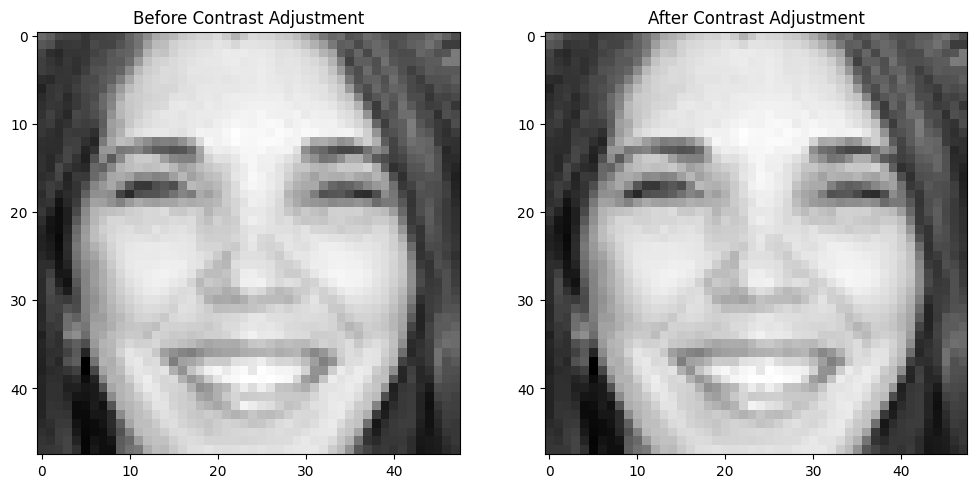

In [ ]:
## 1.19 Showcase of comparisons between original image and contrast adjusted image

img = cv2.imread(train_img[luckyNumber])

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomAutocontrast(p=1.0),
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Contrast Adjustment")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Contrast Adjustment")

In [104]:
## 1.20 Calculate mean and standard deviation of the dataset

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
])

train_img_dataset = cv2.imread(train_img[0], cv2.IMREAD_GRAYSCALE)
train_img_dataset = transform(train_img_dataset)
train_img_dataset = torch.flatten(train_img_dataset)
train_img_dataset = torch.unsqueeze(train_img_dataset, dim=0)

for i in range(1, len(train_img)):
    train_img_data = cv2.imread(train_img[i], cv2.IMREAD_GRAYSCALE)
    train_img_data = transform(train_img_data)
    train_img_data = torch.flatten(train_img_data)
    train_img_data = torch.unsqueeze(train_img_data, dim=0)

    train_img_dataset = torch.cat((train_img_dataset, train_img_data), dim=0)

print(train_img_dataset.shape)
print("\n")
print(train_img_dataset[:5])

mean = torch.mean(train_img_dataset, dim=0)
std = torch.std(train_img_dataset, dim=0)

print(mean, "\n\n", std)

torch.Size([28709, 2304])


tensor([[0.1961, 0.1255, 0.0588,  ..., 0.5608, 0.5333, 0.3255],
        [0.1137, 0.0941, 0.1137,  ..., 0.0588, 0.0941, 0.0941],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.6078, 0.5412, 0.3843,  ..., 0.4353, 0.4392, 0.4275],
        [0.8275, 0.8431, 0.8627,  ..., 0.6235, 0.6118, 0.5961]])
tensor([0.4718, 0.4595, 0.4477,  ..., 0.4418, 0.4450, 0.4483]) 

 tensor([0.3234, 0.3176, 0.3130,  ..., 0.3033, 0.3058, 0.3082])


Text(0.5, 1.0, 'After Normalization')

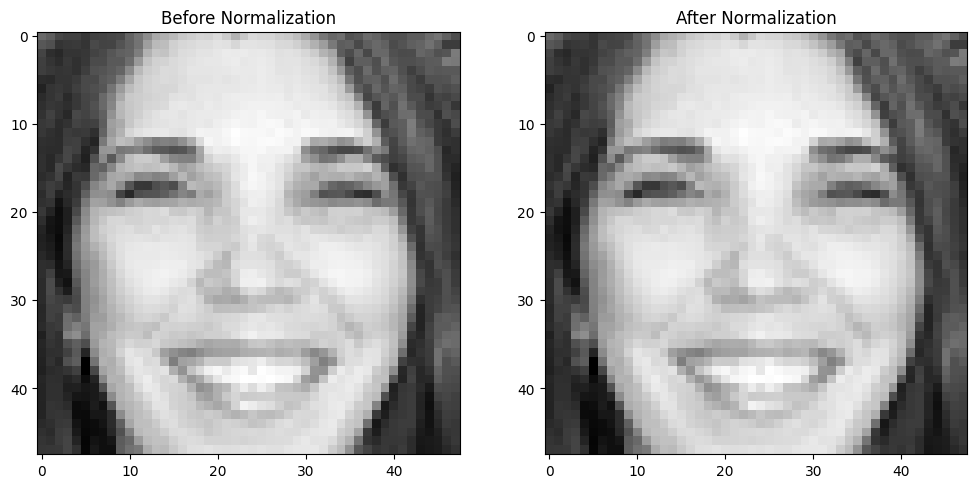

In [106]:
## 1.21 Showcase of comparisons between original image and normalized image

img = cv2.imread(train_img[luckyNumber], cv2.IMREAD_GRAYSCALE)

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=mean, std=std),
])

transformedImg = transform(img)

fig = plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='grey')
plt.title("Before Normalization")

plt.subplot(1, 2, 2)
plt.imshow(transformedImg.numpy()[0], cmap="grey")
plt.title("After Normalization")

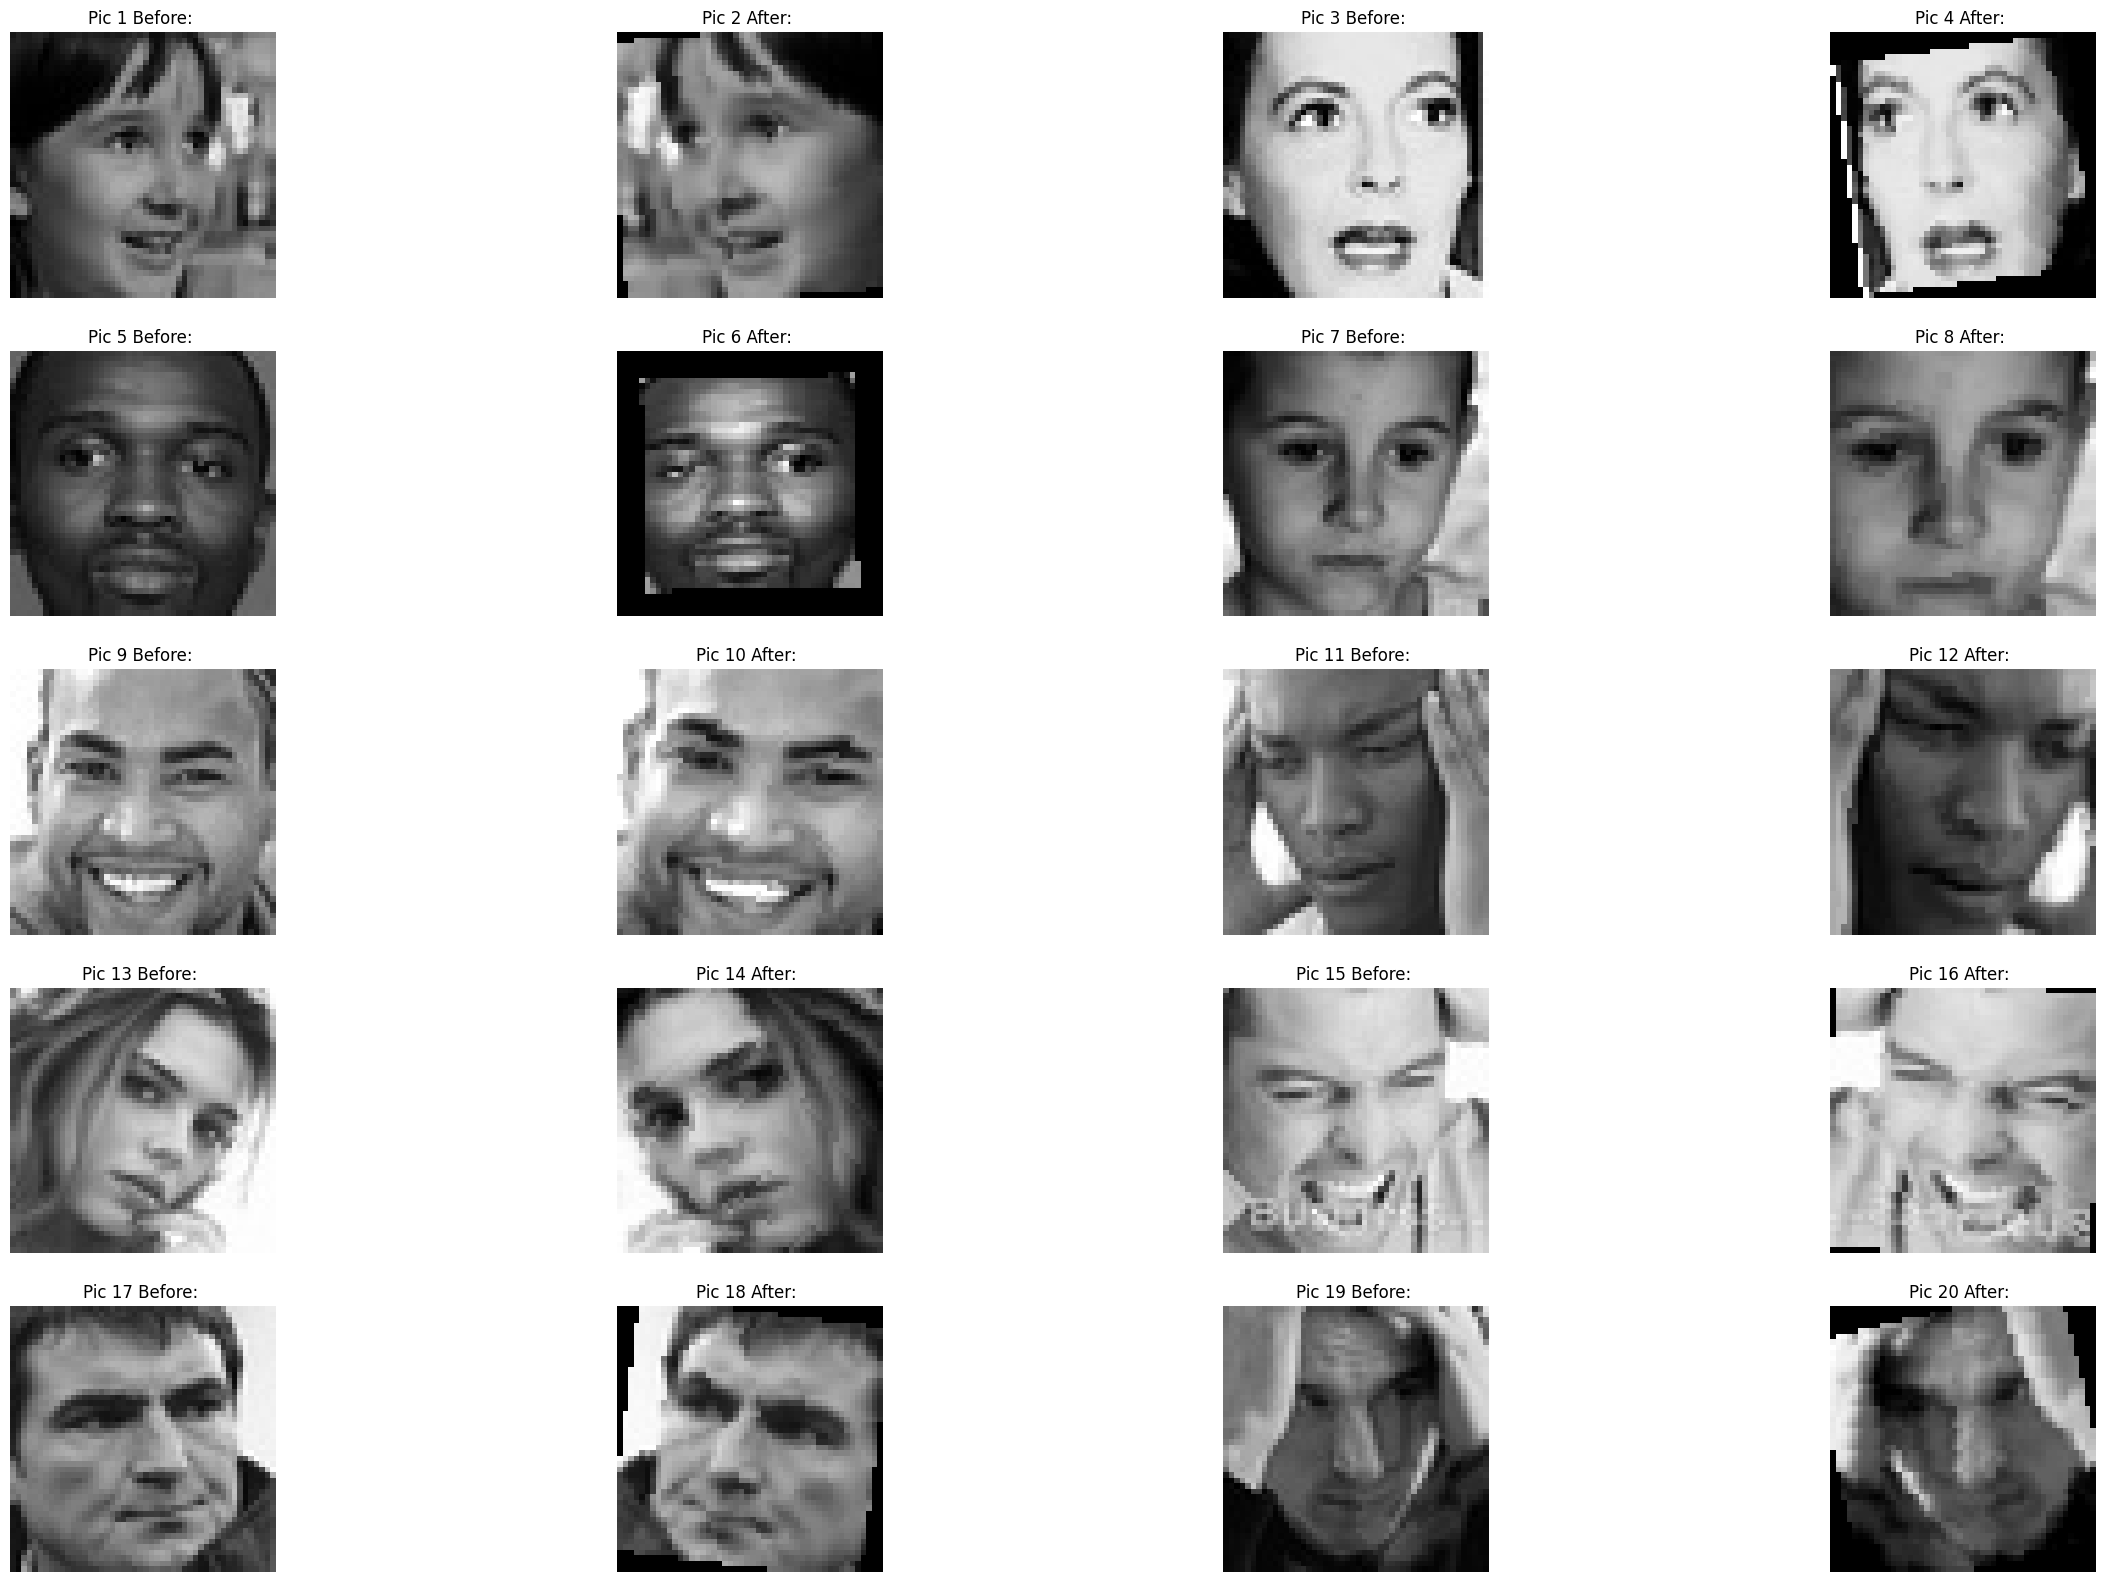

In [ ]:
## 1.22 Showcase 10 Transformed Image With Combination of All Transformation 

transform = v2.Compose([
    v2.ToImage(), # Converting to tensor of type float32
    v2.ToDtype(torch.float32, scale=True),
    v2.RandomHorizontalFlip(p=0.5), # 100% chance to flip an image
    v2.RandomResizedCrop(size=(48,48), scale=(0.8, 0.9), antialias=True), # Resize to 48x48 scalling between 0.08 to 0.1
    v2.RandomAffine(degrees=(-20, 20), scale=(0.8, 1.2)), # Random degree rotation of -25 --> +20 while scaling size between 0.8 to 1.2
    v2.RandomPhotometricDistort(brightness=(0.8, 1.2)),
    v2.RandomAutocontrast(p=1.0),
])

images = []

for i in range(0, 10):
    randNum = random.randrange(0, len(train_img))

    originalImg = cv2.imread(train_img[randNum])
    images.append(originalImg)

    transformedImg = transform(originalImg)
    transformedImg = transformedImg.numpy()[0]
    images.append(transformedImg)

fig = plt.figure(figsize=(30, 20))

for i in range(0, 20):
    plt.subplot(5, 4, i+1)
    img = plt.imread(picAdd[i])

    plt.imshow(images[i], cmap="grey")

    imgName = "Pic " + str((i+1))
    
    if (i+1) % 2 == 0:
        imgName = imgName + " After: "
    else:
        imgName = imgName + " Before: "
    
    plt.title(imgName)

    plt.axis('off')

plt.show()


In [ ]:
## 1.23